In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week 6 data/bank.csv', sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
lis = []
cols = data.columns
for i in cols:
    if data[i].dtype == 'O':
        lis.append(i)

In [5]:
#The list of columns that has categorical values
print(lis)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [6]:
for i in lis:
    print(i.upper())
    print(data[i].value_counts())
    print('-'*100)
    print('-'*100)

JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MARITAL
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
----------------

In [7]:
outcome = data['y']

In [8]:
data.drop(['job','default','housing','loan','month','poutcome','contact','day','marital','education','y'], axis = 1, inplace = True)

In [9]:
data.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [10]:
outcome = pd.DataFrame(outcome, columns = ['y'])

In [11]:
outcome.head()

,y
0,no
1,no
2,no
3,no
4,no


In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [13]:
dat = lb.fit_transform(outcome)

In [14]:
outcome = pd.DataFrame(dat, columns = ['y'])

In [15]:
outcome['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [16]:
mod_data = pd.concat([data, outcome], axis = 1)

In [17]:
mod_data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [18]:
mod_data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [19]:
data = pd.DataFrame(mod_data, columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'])

In [20]:
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
scaled_data = data.copy()

In [24]:
col_names = ['age', 'balance', 'duration', 'pdays']
features = scaled_data[col_names]
sc = StandardScaler()
scaled_features = sc.fit_transform(features.values)

In [25]:
scaled_features.shape

(4521, 4)

In [26]:
scaled_data[col_names] = scaled_features
data = scaled_data
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,-1.056270,0.121072,-0.711861,1,-0.407218,0,0
1,-0.772583,1.118644,-0.169194,1,2.989044,4,0
2,-0.583458,-0.024144,-0.303898,1,2.899143,1,0
3,-1.056270,0.017726,-0.250017,4,-0.407218,0,0
4,1.686036,-0.472753,-0.146102,1,-0.407218,0,0


In [27]:
X_train, y_train, X_test, y_test = (data.iloc[:4000,:6], data.iloc[:4000,6:7], data.iloc[4000:,:6], data.iloc[4000:,6:7])




In [28]:
X_train = X_train.T.values
y_train = y_train.T.values
X_test = X_test.T.values
y_test = y_test.T.values

# Implementing multi layer neural Networks

In [29]:
def sigmoid(Z):
    A = 1 / (1 + (np.exp(-Z)))
    
    return A

In [30]:
def layer_sizes(X, Y):
    n_x1 = X.shape[0] # size of input layer
    n_h1 = 4 # size of nodes in 1st layer
    n_x2 = 4 #size of the input from 1st hidden layer 
    n_h2 = 3 # number of nodes in 2nd layer
    n_y = Y.shape[0] # size of output layer

    return (n_x1, n_x2, n_h1, n_h2, n_y)

In [31]:
def initialize_parameters(n_x1, n_x2, n_h1, n_h2, n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h1, n_x1) * 0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_h2, n_x2) * 0.01
    b2 = np.zeros((n_h2, 1))
    W3 = np.random.randn(n_y, n_h2) * 0.01
    b3 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [32]:
layer_sizes(X_train, y_train)

(6, 4, 4, 3, 1)

In [33]:
def forward_propagation(X, parameters):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']    
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # forward propogation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return A3, cache

In [34]:
def compute_cost(A3, Y, parameters):
    
    m = Y.shape[1] 
    
    cost = -(np.sum(np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3)))) / m
    
    return cost

In [35]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
        
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    
    # backward propagation: calculate dW1, db1, dW2, db2, dW3, db3 
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims = True)
    dZ1 = A1 - Y
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

In [36]:
def update_parameters(parameters, grads, learning_rate=0.001):

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    
    # Update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [37]:
def nn_model(X, Y, num_iterations):

    cost_lis = []
    np.random.seed(3)
    n_x1 = layer_sizes(X, Y)[0]
    n_x2 = layer_sizes(X, Y)[1]
    n_h1 = layer_sizes(X, Y)[2]
    n_h2 = layer_sizes(X, Y)[3]
    n_y = layer_sizes(X, Y)[-1]
    
    parameters = initialize_parameters(n_x1, n_x2, n_h1, n_h2, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # gradient descent

    for i in range(0, num_iterations):
         
        A3, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A3, Y, parameters)
        cost_lis.append(cost)
 
        grads = backward_propagation(parameters, cache, X, Y)
 
        parameters = update_parameters(parameters, grads)
        

    return parameters, cost_lis   

In [38]:
parameters, cost_lis = nn_model(X_train, y_train, num_iterations=20000)

In [39]:
cost_lis[-1]

0.359257973451549

In [40]:
num_iterations = range(20000)

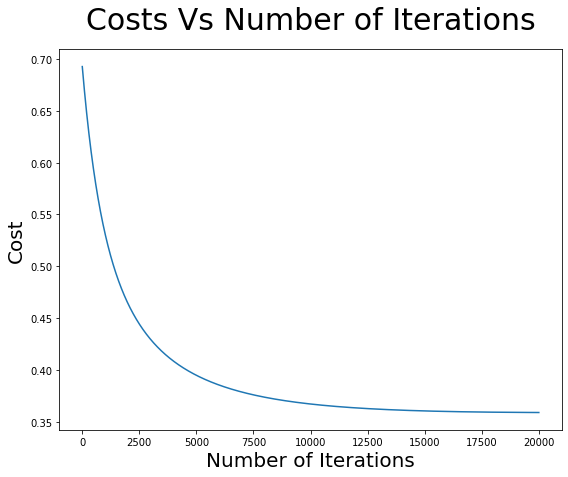

In [41]:
plt.figure(figsize = (9,7))
plt.plot(num_iterations, cost_lis)
plt.xlabel('Number of Iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.title('Costs Vs Number of Iterations', fontsize = 30, pad = 20)
plt.show()

In [42]:
def predict(parameters, X):
    
    A3, cache = forward_propagation(X, parameters)
    predictions = np.round(A3)
    
    return predictions

In [43]:
y_pred = predict(parameters, X_test)

In [44]:
def accuracy(y_test, y_pred):
    true = 0
    false = 0
    for i in range(len(y_test[0])):
        if y_test[0][i] == y_pred[0][i]:
            true += 1
        else:
            false += 1

    accuracy = true * 100 / (true + false)       
    return accuracy

In [45]:
accuracy(y_test, y_pred)

87.90786948176583